https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Sexo - Masculino = 1, Feminino =0

Diabetes - 0 = Não, 1 = Sim

Anemia - 0 = Não, 1 = Sim

Fumante - 0 = Não, 1 = Sim

Morte - 0 = Não, 1 = Sim


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
plt.style.use("seaborn")

In [3]:
#IMPORTAR ARQUIVO
df = pd.read_csv("/content/drive/MyDrive/dataEnginer/heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
#RENOMEAR COLUNAS
df.rename(columns={'age':'idade',
                   'anaemia':'anemia',
                   'creatinine_phosphokinase':'creatina_fosfoquinase',
                   'diabetes':'diabetes',
                   'ejection_fraction':'insuficiencia_cardiaca',
                   'high_blood_pressure':'pressao_alta_sangue',
                   'platelets':'plaquetas',
                   'serum_creatinine':'creatinina_sangue',
                   'serum_sodium':'sodio_sangue',
                   'sex':'sexo',
                   'smoking':'fumante',
                   'time':'tempo',
                   'DEATH_EVENT':'morte'}, inplace=True)

In [7]:
df.columns #COLUNAS

Index(['idade', 'anemia', 'creatina_fosfoquinase', 'diabetes',
       'insuficiencia_cardiaca', 'pressao_alta_sangue', 'plaquetas',
       'creatinina_sangue', 'sodio_sangue', 'sexo', 'fumante', 'tempo',
       'morte'],
      dtype='object')

In [8]:
#QUANTIDADE DE LINHAS E COLUNAS
df.shape

(299, 13)

In [9]:
#TIPOS DE DADOS
df.dtypes

idade                     float64
anemia                      int64
creatina_fosfoquinase       int64
diabetes                    int64
insuficiencia_cardiaca      int64
pressao_alta_sangue         int64
plaquetas                 float64
creatinina_sangue         float64
sodio_sangue                int64
sexo                        int64
fumante                     int64
tempo                       int64
morte                       int64
dtype: object

In [10]:
#Alteração tipo de dado
df['idade'] = df['idade'].astype("int64")

In [11]:
#TIPOS DE DADOS
df.dtypes

idade                       int64
anemia                      int64
creatina_fosfoquinase       int64
diabetes                    int64
insuficiencia_cardiaca      int64
pressao_alta_sangue         int64
plaquetas                 float64
creatinina_sangue         float64
sodio_sangue                int64
sexo                        int64
fumante                     int64
tempo                       int64
morte                       int64
dtype: object

In [12]:
#DADOS ESTATÍSTICOS
df.describe()

,idade,anemia,creatina_fosfoquinase,diabetes,insuficiencia_cardiaca,pressao_alta_sangue,plaquetas,creatinina_sangue,sodio_sangue,sexo,fumante,tempo,morte
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
#CHECAR SEM EXISTEM DADOSS NULOS
df.isnull().sum()

idade                     0
anemia                    0
creatina_fosfoquinase     0
diabetes                  0
insuficiencia_cardiaca    0
pressao_alta_sangue       0
plaquetas                 0
creatinina_sangue         0
sodio_sangue              0
sexo                      0
fumante                   0
tempo                     0
morte                     0
dtype: int64

In [14]:
#Média de idade morte
df.loc[df['morte']==1].groupby('morte')['idade'].mean()

morte
1    65.208333
Name: idade, dtype: float64

Text(0, 0.5, 'Quantidade')

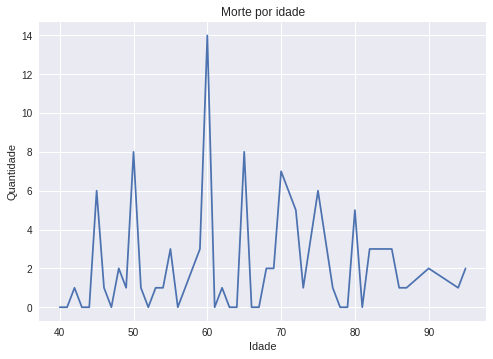

In [15]:
#Morte por idade
df.groupby("idade")["morte"].sum().plot(title="Morte por idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

In [16]:
#idade minima
df['idade'].min()

40

In [17]:
#idade máxima
df['idade'].max()

95

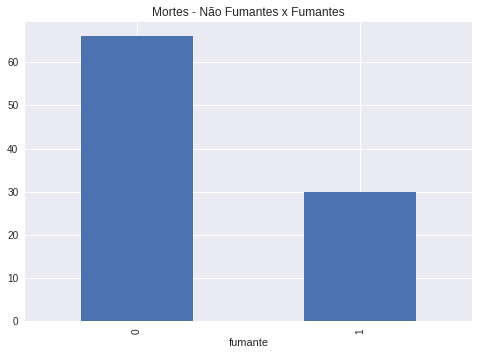

In [18]:
#NÃO FUMANTES X FUMANTES
dfMorte = df.loc[df['morte'] == 1]
dfMorte.groupby('fumante')['morte'].sum().plot.bar(title = 'Mortes - Não Fumantes x Fumantes')

In [19]:
dfMorte['fumante'].value_counts()

0    66
1    30
Name: fumante, dtype: int64

In [20]:
#Diabetes
dfMorte.loc[dfMorte['diabetes'] == 1]['diabetes'].sum()

40

In [21]:
#Taxa de sobrevivência por Sexo 
#[1 = Masculino; 0 = Feminino]

masculino = df[df['sexo'] == 1]
feminino  = df[df['sexo'] == 0]

m_sobreviventes = masculino[df['morte'] == 0]
m_nao_sobrev    = masculino[df['morte'] == 1]
f_sobreviventes = feminino[df['morte']  == 0]
f_nao_sobrev    = feminino[df['morte']  == 1]

rotulos = ['M - Sobrevivente', 
           'M - Não Sobrev', 
           'F - Sobrevivente', 
           'F - Não sobrev']

valores = [len(m_sobreviventes),
           len(m_nao_sobrev),
           len(f_sobreviventes),
           len(f_nao_sobrev)]

grafico = go.Figure(data=[go.Pie(labels=rotulos, values = valores, hole=0.4)])
grafico.update_layout(title='Análise de sobrevivência por Sexo')
grafico.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

